### Checking for signal in the colombos dataset: do cholesterol perturbations affect unknown SDRs? 

In [3]:
%load_ext blackcellmagic
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import hvplot.pandas
import anndata as ad
import seaborn as sns
import matplotlib.pyplot as plt
import tbredox as tx

tx.set_plotting_style_plt()

In [4]:
adata = ad.read_h5ad('../data/tb_adata_v0.h5ad')

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
# 👁 at the cholesterol conditions
adata.var[adata.var.annotation.str.contains('CHOLESTEROL')]#.index.to_list()

,contrast_name,annotation,Test description,Reference description,Experiment_id,Data source,Platform
565,GSM351166.ch2-vs-GSM351166.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
566,GSM351164.ch2-vs-GSM351164.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
567,GSM351165.ch2-vs-GSM351165.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
568,GSM350580.ch2-vs-GSM350580.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_3h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_3h,GSE13978,GEO,GPL4057
569,GSM351167.ch2-vs-GSM351167.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
570,GSM351168.ch2-vs-GSM351168.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_H37Rv_Tween_24h_1mg/ml_Cholesterol,ref_GSE13978_H37Rv_Tween_24h,GSE13978,GEO,GPL4057
571,GSM351208.ch2-vs-GSM351208.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
575,GSM351277.ch2-vs-GSM351277.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057
576,GSM351278.ch2-vs-GSM351278.ch1,POLYSORBATE80:1%_MEDIUM.7H9:1_GROWTH.EXPONENTI...,test_GSE13978_CDC1551_KstR_mutant_Tween_1mg/ml...,ref_GSE13978_CDC1551_Tween_1mg/ml_Cholesterol,GSE13978,GEO,GPL4057


In [6]:
sdr_genes = ['Rv3548c', 'Rv3549c']

In [15]:
ls {'../figures'}

log_fc_sdr_cluster.png  pairwise_distance.png


### Plotting individual genes using our wrapper function

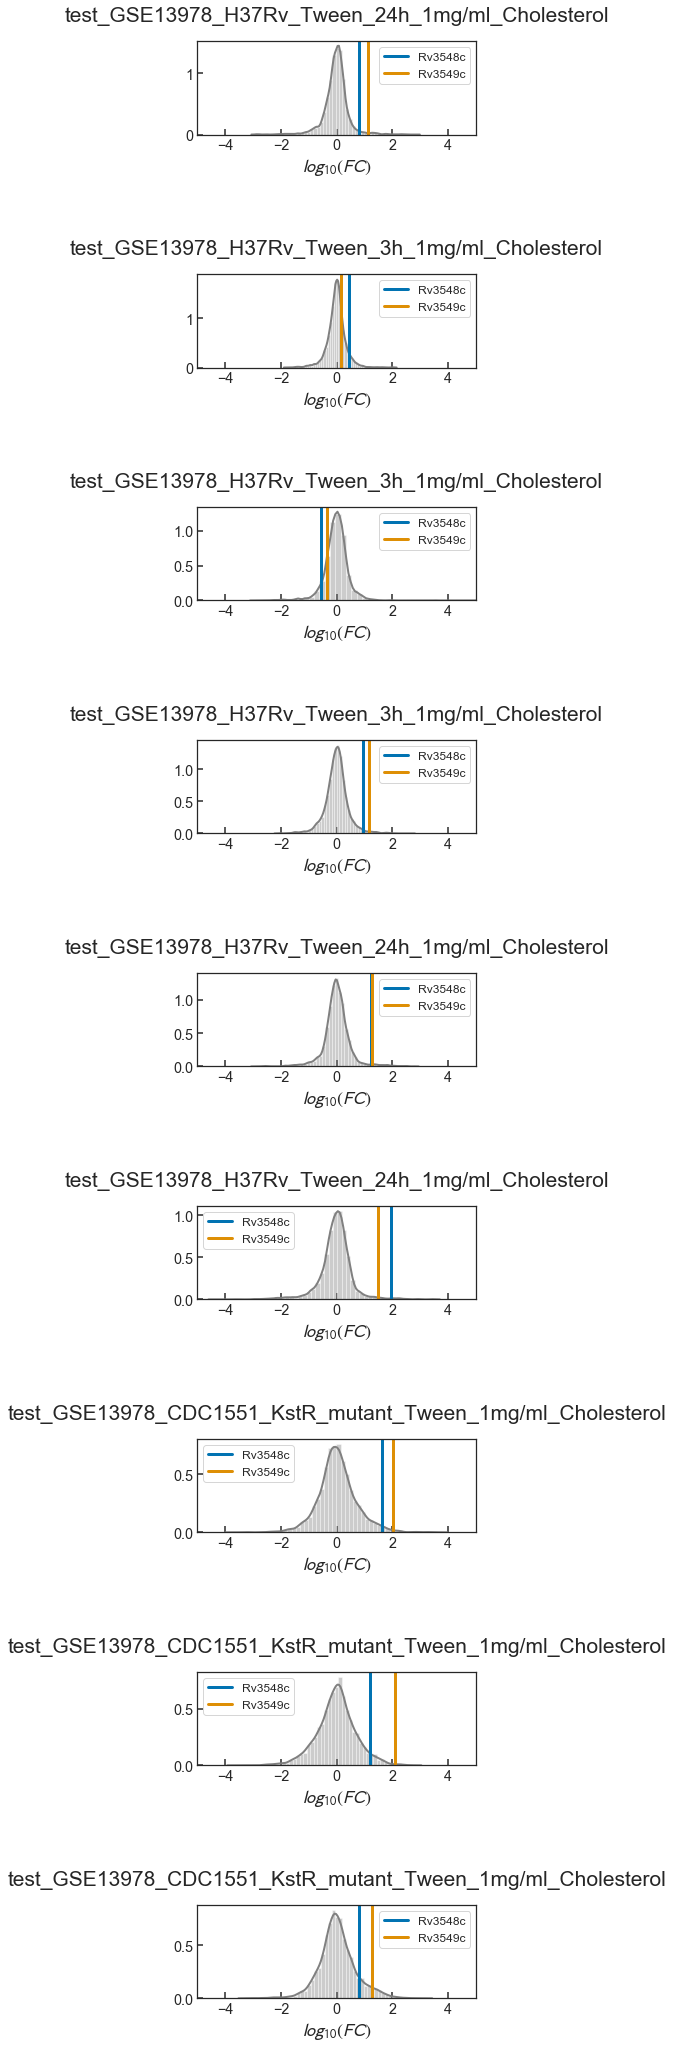

In [17]:
tx.plot_genes_colombos_expression(
    adata,
    condition_str = 'CHOLESTEROL',
    list_of_genes = sdr_genes
)

plt.savefig('../figures/log_fc_sdr_cluster_update.png', bbox_inches = 'tight', dpi = 240)

#### Plot logFC distribution of SDRs vs all the transcriptome. 

In [18]:
sdr_rv_ids = adata.obs[adata.obs['is_sdr'] == 1]['Rv_ID'].values

In [19]:
sdr_rv_ids.shape

(47,)

In [20]:
sdr_rv_ids[:5]

array(['Rv0068', 'Rv0112', 'Rv0148', 'Rv0242c', 'Rv0303'], dtype=object)

In [21]:
chol_samples_ixs = adata.var[adata.var.annotation.str.contains('CHOLESTEROL')].index.to_list()

In [22]:
chol_samples_ixs

['565', '566', '567', '568', '569', '570', '571', '575', '576']

Let's get the log FC distribution for all experiments related to cholesterol.

In [25]:
log_fc_all = adata[:, chol_samples_ixs].X.A

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [26]:
log_fc_all.shape

(4016, 9)

In [27]:
sdr_selector = adata.obs.Rv_ID.isin(sdr_rv_ids)

In [28]:
sdr_selector[:5]

0    False
1    False
2    False
3    False
4    False
Name: Rv_ID, dtype: bool

In [29]:
log_fc_all_sdrs = adata[sdr_selector, chol_samples_ixs].X.A

In [50]:
np.argsort(log_fc_all_sdrs[:, 0])[::-1]

array([41, 44,  2, 42, 45, 43, 15,  8, 21,  6, 25,  7, 10, 18, 22, 29,  4,
       14, 39,  9, 37, 30,  0, 13,  5, 31, 33, 17, 24,  1, 40, 26, 34, 11,
       12, 38, 28, 23, 35, 46, 19, 16, 27, 20, 32,  3, 36])

In [30]:
log_fc_all_sdrs.shape

(47, 9)

In [32]:
n_samples = len(chol_samples_ixs)

In [38]:
log_fc_all.shape

(4016, 9)

In [39]:
chol_samples_ixs[0]

'565'

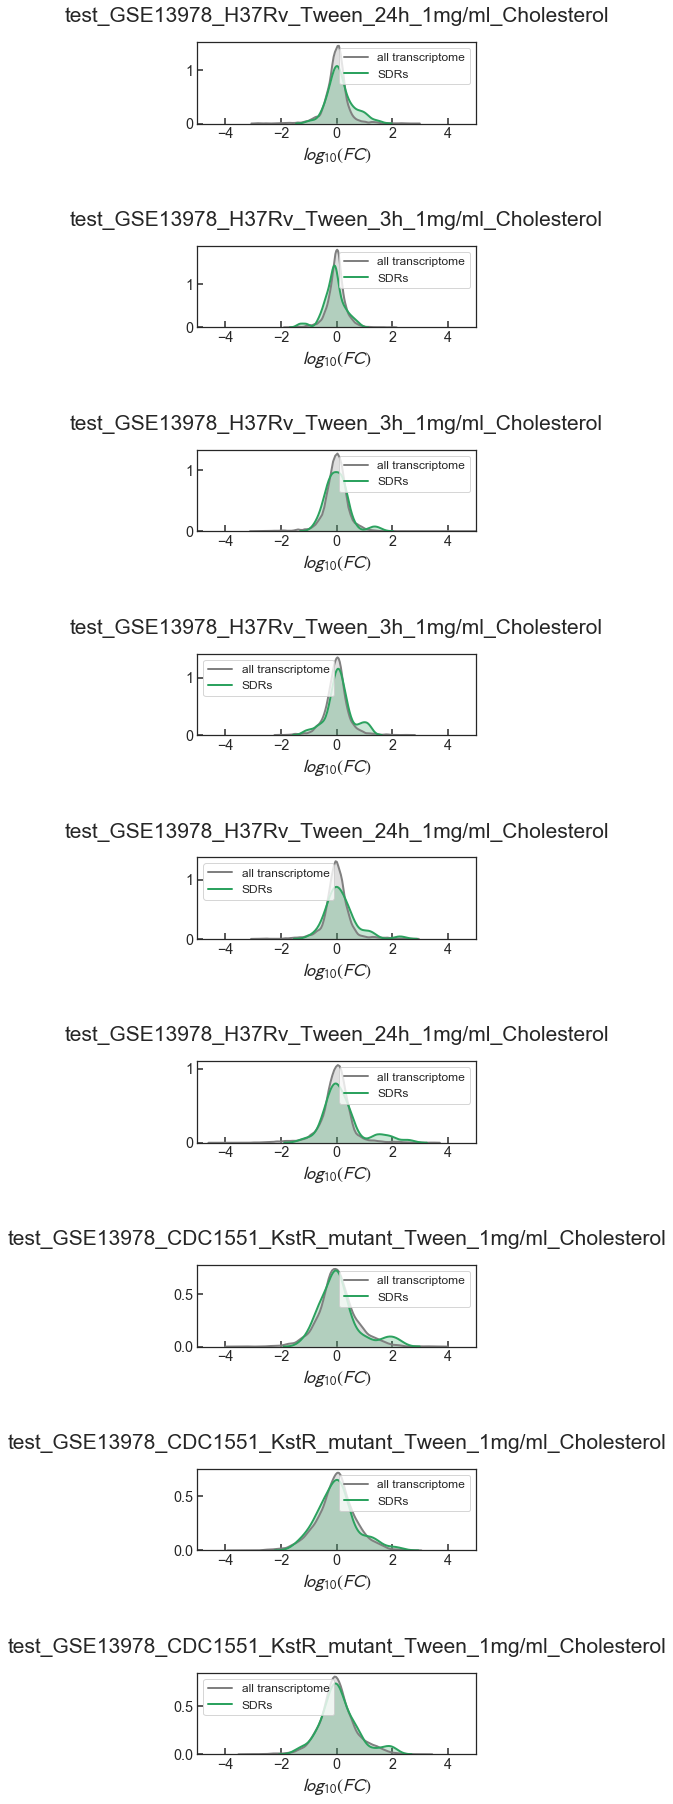

In [45]:
fig = plt.figure(figsize = (7, n_samples * 3.5))
fig.subplots_adjust(hspace = 1.5, wspace = 0.3)

for i in range(n_samples):

    ax = fig.add_subplot(n_samples, 1, i+1)

    ax = sns.kdeplot(log_fc_all[:, i], color = 'grey', label = 'all transcriptome', shade = True)
    ax = sns.kdeplot(log_fc_all_sdrs[:, i], color = '#2ca25f', label = 'SDRs', shade = True)
    ax.set_title(adata.var.loc[chol_samples_ixs[i]]['Test description'])
    ax.set_xlabel(r'$log_{10}(FC)$')
    ax.set_xlim(-5, 5)
    plt.legend()
    
plt.savefig('../figures/sdr_vs_all_transcritpome')

Let's now check which are the top 5 SDRs with highest expression in the first experiment (1mg/ml Cholesterol + Tween after 24 hrs vs Tween only). 

In [58]:
first_experiment = log_fc_all_sdrs[:, 0]

# Reverse with [::-1] so that values are in descending order
ix_sorted = np.argsort(first_experiment)[::-1]

In [59]:
# See fold change values for these ixs 
first_experiment[ix_sorted[:5]]

array([1.4543 , 1.1105 , 1.0364 , 0.9486 , 0.85014], dtype=float32)

In [60]:
# Get top 5 SDRs expressed 
sdr_rv_ids[ix_sorted[:5]]

array(['Rv3502c', 'Rv3549c', 'Rv0148', 'Rv3530c', 'Rv3559c'], dtype=object)

We can see that two of the top 5 SDRs are the ones we found in our analyses: Rv3549c, and Rv0148. 


Now, let's confirm that nothing weird happened with the indices handling by going back to the original data and extracting the logFC values for the top five genes. 

In [64]:
# Make sure those values correspond to the ones in the data 
# this will generate a boolean pd.Series for the genes in the top 5
top_five_first_exp_selector = adata.obs.Rv_ID.isin(sdr_rv_ids[ix_sorted[:5]])

In [66]:
# Take a look 
adata.obs[top_five_first_exp_selector]

,index,Rv_ID,Gene name,Geneid/Contrast_id,is_sdr,func_tuberculist,function_sanger,redox_enzyme,function_redox_,Function,groups,COG,cog_annot,UK_score_4,u1,u2,u3,u1_tn,u2_tn
150,150,Rv0148,Rv0148,151.0,1.0,intermediary metabolism and respiration,steroid dehydrogenase,1.0,Function unknown; possibly involved in cellula...,Short-chain dehydrogenase/reductase SDR,4.0,IQR,nan,3.0,3.064811,-0.945184,1.973145,-8.098337,1.528490
3585,3585,Rv3502c,Rv3502c,3589.0,1.0,intermediary metabolism and respiration,putative dehydrogenase,1.0,Function unknown; supposed involvement in cell...,Probable short-chain type dehydrogenase/reduct...,4.0,IQR,nan,3.0,3.935482,-1.522286,1.073417,-6.285290,3.262874
3613,3613,Rv3530c,Rv3530c,3617.0,1.0,intermediary metabolism and respiration,probable cis-diol dehydrogenase,1.0,Function unknown; probably involved in cellula...,Short-chain dehydrogenase/reductase SDR,4.0,IQR,nan,3.0,3.834700,-1.628743,0.865531,9.936091,-1.046092
3632,3632,Rv3549c,Rv3549c,3636.0,1.0,intermediary metabolism and respiration,short-chain alcohol dehydrogenase family,1.0,Function unknown; supposed involvement in cell...,Probable short-chain type dehydrogenase/reduct...,4.0,IQR,nan,3.0,3.887062,-1.486296,1.067908,-6.657592,2.925072
3642,3642,Rv3559c,Rv3559c,3646.0,1.0,intermediary metabolism and respiration,short-chain alcohol dehydrogenase,1.0,Function unknown; probably involved in cellula...,3-oxoacyl-[acyl-carrier protein] reductase (EC...,4.0,IQR,nan,3.0,2.280869,-0.562132,-0.271307,-6.786085,2.893611


In [65]:
# Extract data 
adata[top_five_first_exp_selector, chol_samples_ixs[0]].X.A

/Users/manoloflores/anaconda3/envs/maxwell/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


array([[1.0364 ],
       [1.4543 ],
       [0.9486 ],
       [1.1105 ],
       [0.85014]], dtype=float32)

If you look carefully, you'll see that indeed we get the same values ! Thus we can be sure we are spot on on our conclusions. 

Finally let's check the top 5 SDRs in the last experiment ( $\Delta$ *kstR* + cholesterol vs cholesterol ). 

In [57]:
sdr_rv_ids[np.argsort(log_fc_all_sdrs[:, -1])[::-1]] [:5]

array(['Rv3530c', 'Rv0687', 'Rv3502c', 'Rv3549c', 'Rv1483'], dtype=object)